### About the project

### Workflow

### Code

#### Base Code

In [66]:
# importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [67]:
# reading the data into panda's dataFrame
df = pd.read_csv("/content/breast_cancer_data.csv")

In [68]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [69]:
df.shape

(569, 33)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We got no null value. Yay :3

In [71]:
df.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,NaN
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,NaN


In [72]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [73]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [74]:
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


0 == Benign

1 == Malignant

In [75]:
# Saperating the feature and target
X = df.drop(columns=['diagnosis', 'Unnamed: 32'], axis=1)
Y = df['diagnosis']

In [76]:
print(X)
print(Y)

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

In [77]:
# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [78]:
print(X.shape, X_train.shape, X_test.shape)

(569, 31) (455, 31) (114, 31)


In [79]:
# standardize data
scalar = StandardScaler()

In [97]:
X_train_std = scalar.transform(X_train)

X_test_std = scalar.transform(X_test)

#### Building The Neural Network

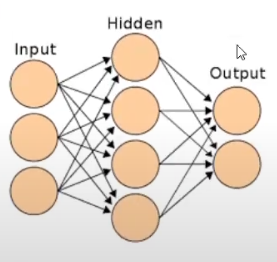

There are 3 types of layer in Neural Network

In [81]:
#importing tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [85]:
# setting up the layers of Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(31,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [86]:
# Compiling the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [87]:
# Training the Neural Network
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.1)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3500 - loss: 6539437.5000 - val_accuracy: 0.3478 - val_loss: 17541732.0000
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3500 - loss: 4947838.0000 - val_accuracy: 0.3478 - val_loss: 12392423.0000
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3500 - loss: 3397219.0000 - val_accuracy: 0.3478 - val_loss: 7305982.0000
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3500 - loss: 1864621.7500 - val_accuracy: 0.3696 - val_loss: 2273327.5000
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3940 - loss: 445764.5938 - val_accuracy: 0.6522 - val_loss: 99206.5000
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6346 - loss: 185032.3281 - val_accuracy: 0.3478 - val_loss: 370520.3438
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4278 - loss: 70275.7266 - val_accuracy: 0.5000 - val_loss: 4991.8223
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 

as you can see the accuracy went from 35% to 54% which is not good accuracy for a model.

that's why we need to used standardazied data ---

In [92]:
# Training the Neural Network with standardazied data
history = model.fit(X_train_std, Y_train, epochs=10, validation_split=0.1)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2575 - loss: 2.0360 - val_accuracy: 0.3478 - val_loss: 1.2939
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5530 - loss: 0.9070 - val_accuracy: 0.7609 - val_loss: 0.5031
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7982 - loss: 0.4282 - val_accuracy: 0.8913 - val_loss: 0.3258
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8632 - loss: 0.3091 - val_accuracy: 0.9348 - val_loss: 0.2647
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8926 - loss: 0.2572 - val_accuracy: 0.9130 - val_loss: 0.2304
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8986 - loss: 0.2245 - val_accuracy: 0.9348 - val_loss: 0.2063
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9092 - loss: 0.2010 - val_accuracy: 0.9565 - val_loss: 0.1871
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9179 - loss: 0.1825 - val_accuracy: 0.9565 - val_loss

with standardized data we got 25% accuracy to 92% accuracy!!!

So you can see standardizing data before training is very important.

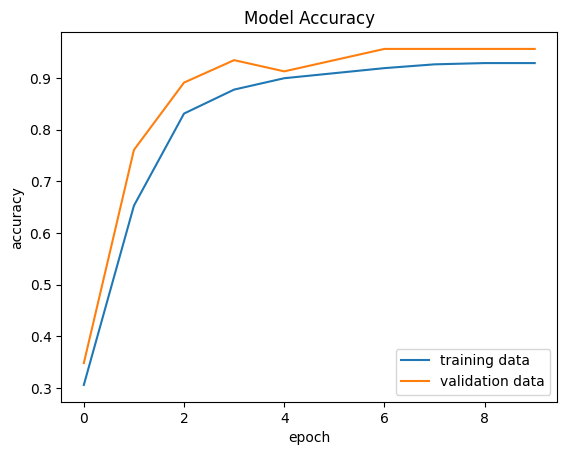

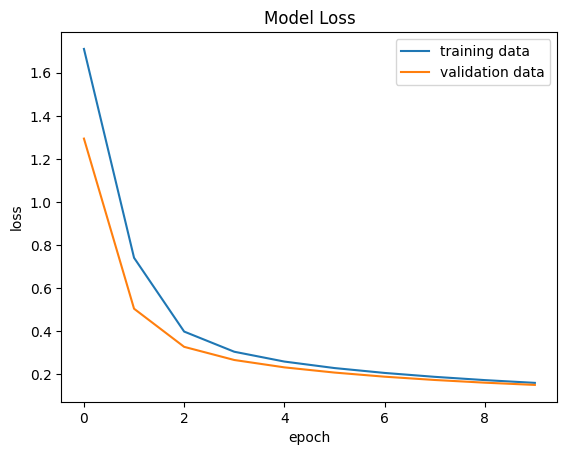

In [94]:
# Visualizing accuracy and loss

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'upper right')
plt.show()

In [98]:
# Accuracy of the model on test data
loss, acc = model.evaluate(X_test_std, Y_test)
print('Test Accuracy: ', acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9321 - loss: 0.1820 
Test Accuracy:  0.9473684430122375


In [99]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 31)
[-0.22064846 -0.08700339 -1.47192915 -0.10537391 -0.21479674  2.05627941
 -0.18759821  0.04345969  0.3431473   0.48693221  0.20971492  0.41483725
  2.38110688  0.53816721  0.01895993  0.95128447  0.31678369  0.28189043
  2.21465008 -0.39276605  0.44485916 -0.3863489  -1.69650664 -0.42190004
 -0.44557481  0.23041821 -0.75521902 -0.60192371 -0.26629174 -1.09776353
 -0.65597459]


In [102]:
Y_pred = model.predict(X_test_std)
print(Y_pred.shape)
print(Y_pred[0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
(114, 2)
[0.47665608 0.6053425 ]


Here the probability of the target result being 0 is 47% and 1 is 60%.

The highest probability is the result.

In [108]:
# armax function -- max index of array
my_list = [10, 30, 20]

index_of_max = my_list.index(max(my_list))
print(my_list)
print(index_of_max)

[10, 30, 20]
1


In [109]:
# converting the prediction probality to class lebels
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


In [120]:
# Building the predictive system
input_data = (842517,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing data
input_data_std = scalar.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if (prediction_label[0] == 1):
  print('The tumor is Malignant')
else:
  print('The tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.3259777 0.8626244]]
[1]
The tumor is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [121]:
# Building the predictive system
input_data = (874662,11.81,17.39,75.27,428.9,0.1007,0.05562,0.02353,0.01553,0.1718,0.0578,0.1859,1.926,1.011,14.47,0.007831,0.008776,0.01556,0.00624,0.03139,0.001988,12.57,26.48,79.57,489.5,0.1356,0.1,0.08803,0.04306,0.32,0.06576)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing data
input_data_std = scalar.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if (prediction_label[0] == 1):
  print('The tumor is Malignant')
else:
  print('The tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0.9265789  0.06612639]]
[0]
The tumor is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
